## Rental Price EDA 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df =pd.read_csv('rental.csv',index_col=0)
#check shape
shape = df.shape
#check shape
shape = df.shape
df

,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2015-01-31,2015-02-28,2015-03-31,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28
RegionID,,,,,,,,,,,,,,,,,,,,,
6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2519.633872,2532.526220,2552.494527,...,3471.695054,3507.169000,3527.537949,3530.370179,3514.693097,3492.480172,3468.327426,3453.597591,3458.924544,3488.735636
12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1829.491393,1844.612499,1862.102323,...,2817.809080,2828.720362,2840.709137,2846.201537,2849.944139,2845.777630,2842.472672,2834.889984,2861.149444,2884.217593
39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1192.772833,1196.480207,1201.782616,...,1588.762190,1599.384752,1603.832709,1605.936383,1606.777190,1606.008116,1601.293595,1596.883827,1595.994789,1598.473864
17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1525.898035,1534.847198,1545.535852,...,2135.297477,2154.853317,2161.770567,2157.918278,2149.395505,2139.618246,2138.892360,2141.078458,2151.641380,2172.130290
6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,994.108337,997.530557,1004.104932,...,1434.863066,1437.503190,1438.405606,1436.567604,1430.043966,1414.588476,1405.290319,1399.937448,1405.874726,1412.425356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16007,20418,Surf City,city,NC,NC,"Wilmington, NC",Pender County,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1751.329577,1795.000000
6459,21336,Pendergrass,city,GA,GA,"Jefferson, GA",Jackson County,NaN,NaN,NaN,...,NaN,NaN,NaN,1991.678610,2005.425210,1999.533909,1987.517792,2005.645164,2007.414753,2005.000000
124999,22408,Lake Hart,city,FL,FL,"Orlando-Kissimmee-Sanford, FL",Orange County,NaN,NaN,NaN,...,2499.434958,2492.957795,2562.350062,2613.727060,2609.188756,2514.304695,2482.493642,2481.646240,2483.124054,2492.260317


In [4]:
# I notic that New York isn't a city but a state so we need to change it to New York City
df.loc[df["RegionName"] == "New York", "RegionName"] = "New York City"

In [5]:
#now we want to find the average rent price of every city and if there are null values for rent we ignore them
date_cols = df.columns[8:]
df["avg_rent"] = df[date_cols].mean(axis=1,skipna=True)
df_avg_rent = df[["RegionName","State","Metro", "avg_rent"]]
df_avg_rent

,RegionName,State,Metro,avg_rent
RegionID,,,,
6181,New York City,NY,"New York-Newark-Jersey City, NY-NJ-PA",2905.171966
12447,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",2406.760640
39051,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",1375.087082
17426,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",1787.980237
6915,San Antonio,TX,"San Antonio-New Braunfels, TX",1225.675376
...,...,...,...,...
16007,Surf City,NC,"Wilmington, NC",1773.164789
6459,Pendergrass,GA,"Jefferson, GA",2000.316491
124999,Lake Hart,FL,"Orlando-Kissimmee-Sanford, FL",2501.031192


In [6]:
#Sorting by most expensive average rent price
df_avg_rent = df_avg_rent.sort_values(by="avg_rent",ascending=False)
df_avg_rent

,RegionName,State,Metro,avg_rent
RegionID,,,,
47500,Sagaponack,NY,"New York-Newark-Jersey City, NY-NJ-PA",102564.547771
36840,Bridgehampton,NY,"New York-Newark-Jersey City, NY-NJ-PA",76652.700630
7774,Water Mill,NY,"New York-Newark-Jersey City, NY-NJ-PA",66550.211298
14585,Westhampton Beach,NY,"New York-Newark-Jersey City, NY-NJ-PA",49361.363663
48451,Westhampton,NY,"New York-Newark-Jersey City, NY-NJ-PA",43333.333333
...,...,...,...,...
24315,Danville,IL,"Danville, IL",682.992485
39173,Johnstown,PA,"Johnstown, PA",655.897177
47440,Rolla,MO,"Rolla, MO",625.880276


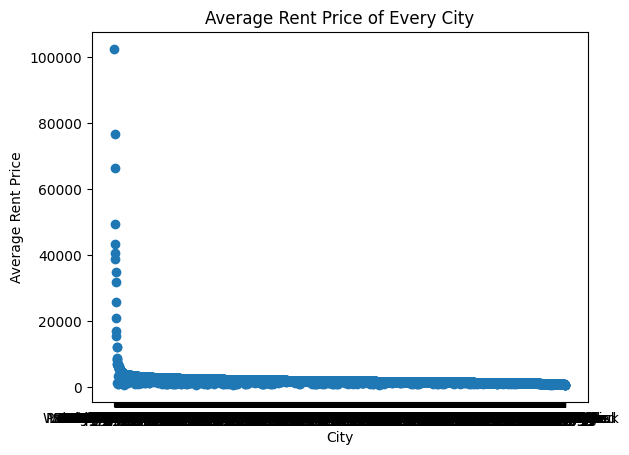

In [7]:
#Make scatter plot of the average rent price of every city
plt.scatter(df_avg_rent["RegionName"],df_avg_rent["avg_rent"])
plt.xlabel("City")
plt.ylabel("Average Rent Price")
plt.title("Average Rent Price of Every City")
plt.show()


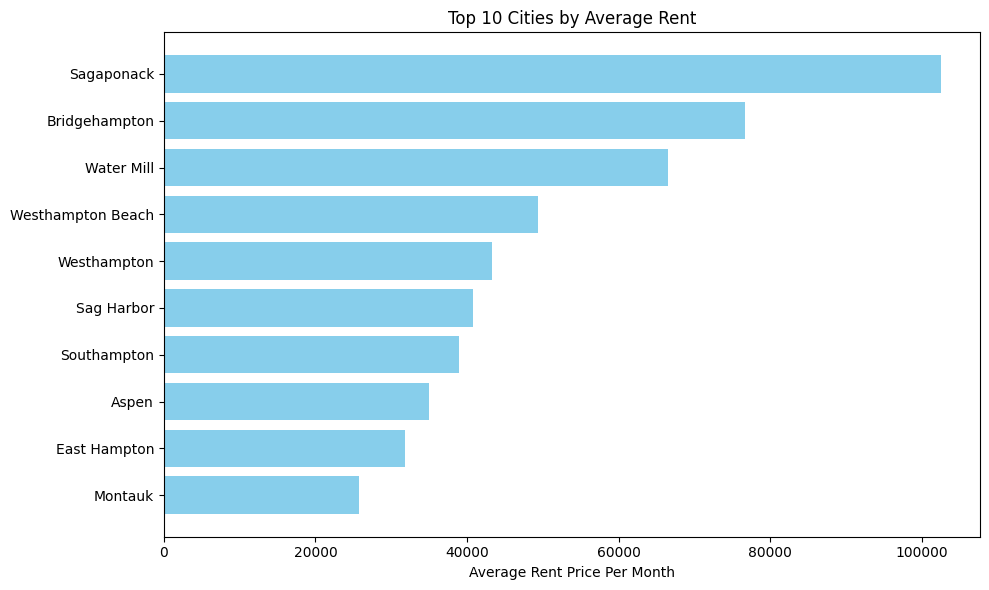

In [8]:
#Not much we learnt from that except there is a huge difference between the top 10-20 then the rest of the cities
#Now lets look at the top 10 cities
top_cities = df_avg_rent.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_cities['RegionName'], top_cities['avg_rent'], color='skyblue')
plt.xlabel('Average Rent Price Per Month')
plt.title('Top 10 Cities by Average Rent')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()



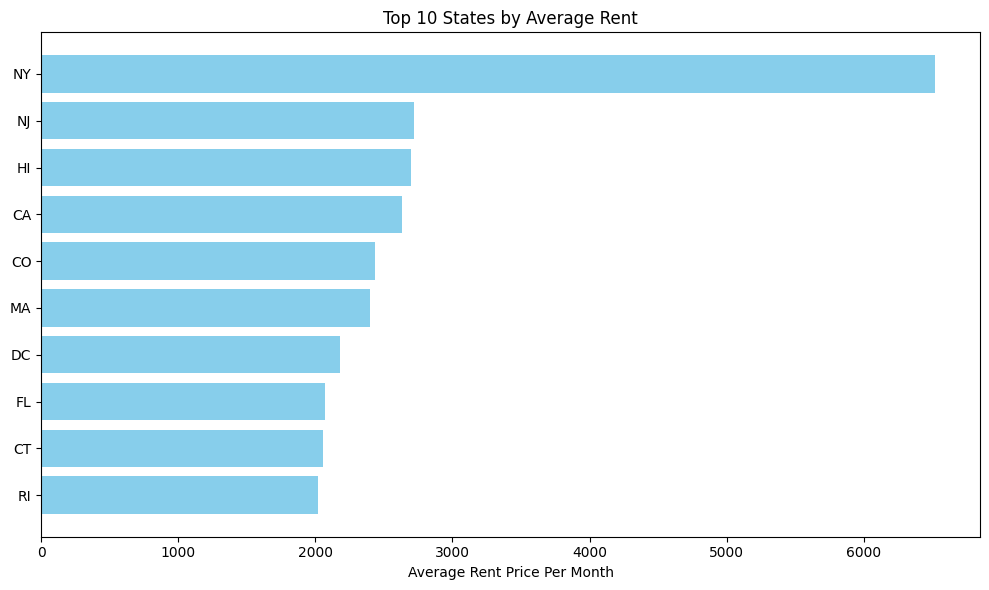

In [9]:
#Now lets do analysis by state
state_avg_rent = df.groupby('State')['avg_rent'].mean().sort_values(ascending=False)
top_states = state_avg_rent.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_states.index, top_states.values, color='skyblue')
plt.xlabel('Average Rent Price Per Month')
plt.title('Top 10 States by Average Rent')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Top 10 States by Number of Listings')

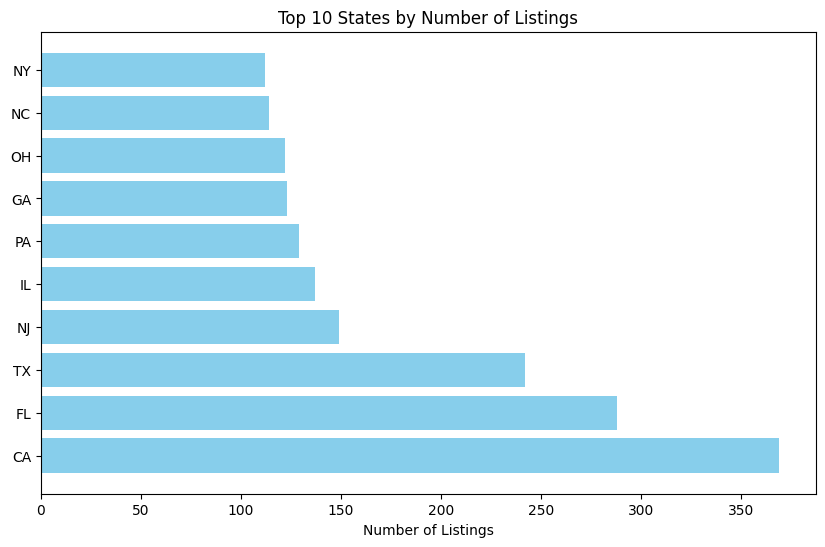

In [10]:
#Now lets look at the number of total listings by state
state_listings = df.groupby('State')['RegionName'].count().sort_values(ascending=False)
top_states_listings = state_listings.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_states_listings.index, top_states_listings.values, color='skyblue')
plt.xlabel('Number of Listings')
plt.title('Top 10 States by Number of Listings')

In [11]:
#Now lets see how many states are in filtered dataset
state_listings.shape 

(51,)

In [12]:
#I suspect one state is repeated twice or DC is considered as a state
state_list = state_listings.index.tolist()
for i in state_list:
    if i == "DC":
        print(i)

DC


In [13]:
#I want to see number of unqiue County names and metro names
county_names = df["CountyName"].unique()
print(len(county_names))
metro_names = df["Metro"].unique()
print(len(metro_names))

728
560


In [14]:
#How many cities belong to each metro
metro_counts = df["Metro"].value_counts()
print(metro_counts)
#How many cities belong to each county
county_counts = df["CountyName"].value_counts()
print(county_counts)


Metro
New York-Newark-Jersey City, NY-NJ-PA      175
Chicago-Naperville-Elgin, IL-IN-WI         114
Los Angeles-Long Beach-Anaheim, CA         110
Dallas-Fort Worth-Arlington, TX             87
Miami-Fort Lauderdale-Pompano Beach, FL     83
                                          ... 
Muskegon, MI                                 1
Stillwater, OK                               1
Wilson, NC                                   1
Twin Falls, ID                               1
Ozark, AL                                    1
Name: count, Length: 559, dtype: int64
CountyName
Los Angeles County    76
Montgomery County     57
Orange County         53
Middlesex County      53
Cook County           50
                      ..
Spalding County        1
Dinwiddie County       1
Grand Forks County     1
Russell County         1
Caldwell County        1
Name: count, Length: 728, dtype: int64


In [15]:
# I want to how rent prices have changed over the years for a specific city
# First, let's select a city to analyze
city_name = "New York City"
rent_city = df[df["RegionName"] == city_name]
# Extract and transpose rent data
rent_data = rent_city[date_cols].T
rent_data.columns = ['Rent']
rent_data

,Rent
2015-02-28,2532.526220
2015-03-31,2552.494527
2015-04-30,2578.354940
2015-05-31,2600.290353
2015-06-30,2620.562669
...,...
2024-10-31,3492.480172
2024-11-30,3468.327426
2024-12-31,3453.597591
2025-01-31,3458.924544


In [16]:
rent_data.index = pd.to_datetime(rent_data.index, format="%Y-%m-%d", errors="raise")

# Now you have valid monthly data as a time-indexed DataFrame.
print(rent_data.head())


                   Rent
2015-02-28  2532.526220
2015-03-31  2552.494527
2015-04-30  2578.354940
2015-05-31  2600.290353
2015-06-30  2620.562669


/var/folders/pk/cfn_h0j14zb_9gy053hsz8d40000gn/T/ipykernel_9271/1105831285.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  rent_yearly_avg = rent_data.resample("Y").mean()


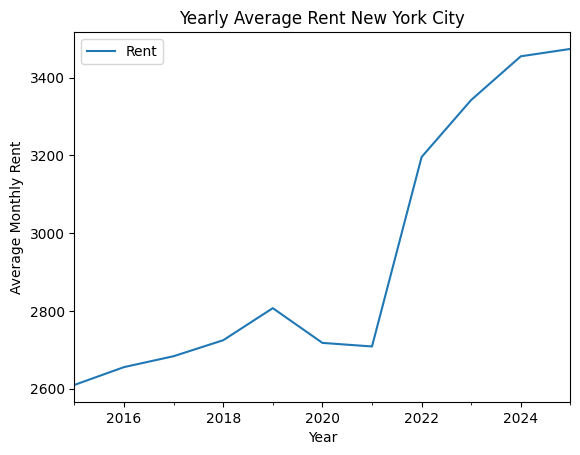

In [17]:
rent_yearly_avg = rent_data.resample("Y").mean()

rent_yearly_avg.plot()
plt.title("Yearly Average Rent New York City")
plt.xlabel("Year")
plt.ylabel("Average Monthly Rent")
plt.show()

#### We can see the impact Covid 19 had from 2019 to 2021. This is due to fall in demand to rent in an expensive city like NYC during economic uncertainty. Rent prices have done up alot in NYC probably due to the end of covid pendamic so people are return back to normal life which increase demand with limted supply which caused rent prices to inflate.

In [18]:
#I think we have enough information to build out a kmeans clustering model to cluster cities by their average rent price. So when user inputs a rent amount they are 
#willing to pay we can cluster the cities by their average rent price and return the top 5 cities that are most similar to the user's rent amount. #I am also thinking
#of adding a job distribution model to the app so we can recommend cities based on the job distribution in the US.
df_avg_rent.to_csv("avg_rent.csv",index=False)
